### Import library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#For confusion Matix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


### Import CSV

In [3]:
df=pd.read_csv('hfailure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# checking for missing values
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# statistical measures about the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data visualization for better understanding 

In [7]:

new_df = df.drop(['anaemia','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium'], axis=1)
new_df


,age,diabetes,high_blood_pressure,platelets,sex,smoking,time,DEATH_EVENT
0,75.0,0,1,265000.00,1,0,4,1
1,55.0,0,0,263358.03,1,0,6,1
2,65.0,0,0,162000.00,1,1,7,1
3,50.0,0,0,210000.00,1,0,7,1
4,65.0,1,0,327000.00,0,0,8,1
...,...,...,...,...,...,...,...,...
294,62.0,1,1,155000.00,1,1,270,0
295,55.0,0,0,270000.00,0,0,271,0
296,45.0,1,0,742000.00,0,0,278,0
297,45.0,0,0,140000.00,1,1,280,0


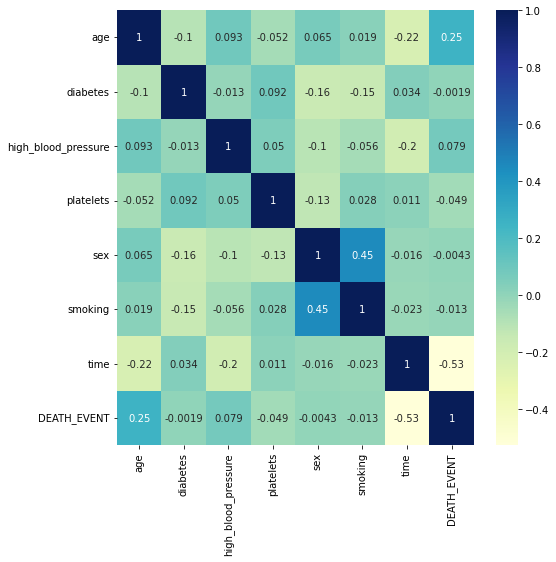

In [8]:
import seaborn as sb
plt.figure(figsize=(8,8))
sb.heatmap(new_df.corr(), cmap='YlGnBu', annot=True);

### Main Features that effect Death_Event 

In [9]:
main_features = ['diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','time']
x = df[main_features]

In [10]:
y = df["DEATH_EVENT"]

In [11]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
# fit all models

classifiers = LazyClassifier(ignore_warnings=True, custom_metric=None)
models,predictions = classifiers.fit(X_train, X_test, Y_train, Y_test) 
print(models)

100%|██████████| 29/29 [00:05<00:00,  5.66it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.92               0.88     0.88      0.91   
SVC                                0.90               0.86     0.86      0.90   
LGBMClassifier                     0.88               0.84     0.84      0.88   
ExtraTreeClassifier                0.85               0.83     0.83      0.85   
RandomForestClassifier             0.87               0.83     0.83      0.86   
KNeighborsClassifier               0.87               0.83     0.83      0.86   
NuSVC                              0.88               0.83     0.83      0.88   
NearestCentroid                    0.82               0.82     0.82      0.82   
LabelSpreading                     0.85               0.82     0.82      0.85   
LabelPropagation                   0.83               0.81     0.81      0.83   
AdaBoostClassifier          

# 1.Random Forest Model

### Training Data 

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [13]:
model1 = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
model1.fit(X_train, Y_train)
accuracy_list = []

## Checking Accuracy

In [14]:
model1_pred = model1.predict(X_test)
model1_acc = accuracy_score(Y_test, model1_pred)
accuracy_list.append(100*model1_acc)
print("Accuracy of Random Forest Model is : ", "{:.2f}%".format(100* model1_acc))

Accuracy of Random Forest Model is :  88.33%


## Confusion Matrix 

<Figure size 432x288 with 0 Axes>

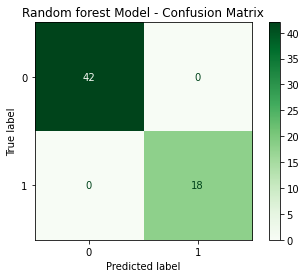

In [15]:
plt.figure()

plot_confusion_matrix(model1, X_test,model1_pred , cmap=plt.cm.Greens )
plt.title("Random forest Model - Confusion Matrix")

plt.show()

## Classification report

In [16]:
from sklearn.metrics import classification_report
 
print(classification_report(Y_test, model1_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60



# 2.Logistic Regression Model

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

### Training data 

In [18]:
model2 = LogisticRegression()

In [19]:
model2.fit(X_train, Y_train)
X_train_prediction = model2.predict(X_train)

###  Data Accuracy

In [20]:
# accuracy on test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score( Y_test,X_test_prediction)

In [21]:
print('Accuracy using Logistic Regression : ', test_data_accuracy)
print("Accuracy using Logistic Regression in (%): ", "{:.2f}%".format(100* test_data_accuracy))

Accuracy using Logistic Regression :  0.85
Accuracy using Logistic Regression in (%):  85.00%


## Confusion Matrix 


<Figure size 432x288 with 0 Axes>

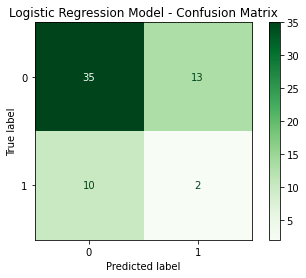

In [22]:
plt.figure()
color = 'black'

plot_confusion_matrix(model2, x_test, X_test_prediction, cmap=plt.cm.Greens)
plt.title("Logistic Regression Model - Confusion Matrix")

plt.show()

 
## Classification report

In [23]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        43
           1       0.25      0.18      0.21        17

    accuracy                           0.62        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.58      0.62      0.59        60



#  3.GradientBoostingClassifier Model

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
# GradientBoostingClassifier

model3 = GradientBoostingClassifier(max_depth=2, random_state=1)

model3.fit(x_train,y_train)

#ytest
y_pred = model3.predict(x_test)
model3_acc = accuracy_score(y_test,y_pred)

accuracy_list.append(100*model3_acc)


In [25]:
print('Accuracy using GradientBoostingClassifier : ', model3_acc)
print("Accuracy in (%): ", "{:.2f}%".format(100* model3_acc))

Accuracy using GradientBoostingClassifier :  0.9166666666666666
Accuracy in (%):  91.67%


## Confusion Matrix 


<Figure size 432x288 with 0 Axes>

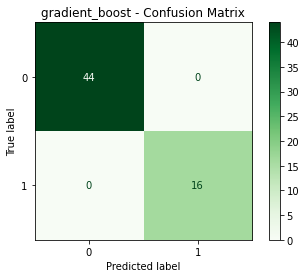

In [26]:
#cm = confusion_matrix
plt.figure()
color = 'black'

plot_confusion_matrix(model3, x_test, y_pred, cmap=plt.cm.Greens)
plt.title("gradient_boost - Confusion Matrix")

plt.show()


## Classification report

In [27]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60

